# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

# Gausian Dist 
strickly for stage (Andy has gimbal)

In [ ]:
# gains access to the data -> ask Arij if data frames can be shared accross files
data = pd.read_csv("random_data_gaus.csv")
df = pd.DataFrame(data)

# sets variables
x = df["Horizontal"]
y = df["Height"]
z = df["Frequency"].shape((x,y)) # not that lmao (has to be a 2d variable) ->ASK FOR HELP LATER

X, Y = np.meshgrid(x,y) # assumes we've generated the data alr

""" a = np.arange(6).reshape((3, 2))
a
array([[0, 1],
       [2, 3],
       [4, 5]])

np.arange(8)*scinti_h
 """
# creates 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap="plasma")
fig.colorbar(surf)

# sets labels
ax.set_xlabel("Horizontal displacement (cm)")
ax.set_ylabel("Stage Height (cm)")
ax.set_zlabel("Hit Rate (how many shot out/how many got captured)")
ax.set_title("Gaussian Distribution of Hits")

# makes it look nice
plt.tight_layout # idk if i should have it there or not
plt.show()

# Bar Graph

Separated

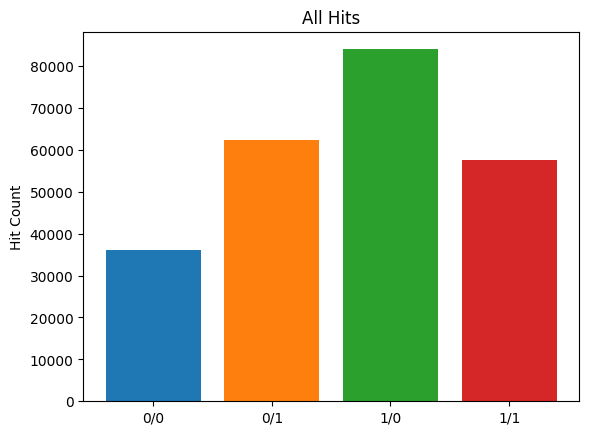

In [ ]:
fig, ax = plt.subplots()


hit_events = {
    "nonevent" : 0,
    "0/0" : 36000,
    "0/1" : 62400,
    "1/0" : 84000,
    "1/1" : 57600,
}


#hit_types = ["0/0", "0/1", "1/0", "1/1"]
#hit_count = [36000, 62400, 84000, 57600] # will have to extrapolate from Arij's tables
#bar_labels = ["zero_zero", "zero_one", "one_zero", "one_one"]
bar_colours = ["hotpink", "palegreen","mediumseagreen", "mediumvioletred"]

for event in hit_events:
    if event == "nonevent":
        continue
    ax.bar(x=event, height=hit_events[event], bottom=0)

#ax.bar(hit_types, hit_count, label=bar_labels, color=bar_colours)

ax.set_title("All Hits")
ax.set_ylabel("Hit Count")

plt.tight_layout
plt.show()

Stacked

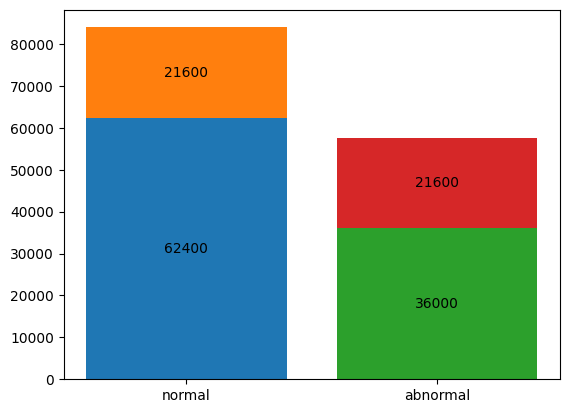

In [ ]:
groups = {
    "normal"   : ["nonevent", "0/1", "1/0"],
    "abnormal" : ["nonevent", "0/0", "1/1"],
}

width = 0.5

fig, ax = plt.subplots()




for group in groups:
    for idx, subtype in enumerate(groups[group]):
        if idx==0:
            continue

        box2 = groups[group]

        current_value = box2[idx]
        previous_value = box2[idx-1]

        top    = hit_events[current_value]
        bottom = hit_events[previous_value]
        this_bar = ax.bar(x=group, height=top-bottom, bottom=bottom, label=current_value)
        ax.bar_label(this_bar, label_type='center')



#ax.legend()

""" ax.set_title("All Hits")
ax.set_ylabel("Hit Count") """

#plt.tight_layout
plt.show()

# Heatmap

Using matplotlib

In [ ]:
# Seed for reproducibility (okayyyy??? -> LOOK IT UP)
np.random.seed(2)

#data = np.random.random((40, 12)) #first one won't be 40 cus i took it from fake_data.csv

x_labels = ["Time"]
y_labels = ["0/1","2/3", "4/5", "6/7", "8/9","10/11", "12/13", "14/15",
            "16/17", "18/19", "20/21", "22/23"]
         
fig, ax = plt.subplots()
ax.imshow(data)

ax.set_xticks(np.arange(len(x_labels)), labels = x_labels)
ax.set_yticks(np.arange(len(y_labels)), labels = y_labels)
plt.show() 

Using pyplot (same as matplotlib)

In [ ]:
data = pd.read_csv ("file_name.csv")

hit_count = df["Hits"] #see csv notes (paper)
x_labels = hit_count
y_labels = ["0/1","2/3", "4/5", "6/7", "8/9","10/11", "12/13", "14/15",
            "16/17", "18/19", "20/21", "22/23"]
fig = px.imshow(data,
                labels = dict(x = "Hits", y = "Channels"), color = "viridis",),
x =x_labels, y = y_labels # what is data supposed to be?

fig.update_xaxes(side="bottom") #not sure that it's called bottom, could be called bot
fig.show()